<a href="https://colab.research.google.com/github/b62mp1/files/blob/main/Graphs%26Metrics/SMA/SMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_datareader
from pandas_datareader import data as pdr

In [44]:
stock_name = "GOOG"
df=pdr.get_data_yahoo(stock_name, start=('2020-01-01'), end='2022-04-19').reset_index()
print("Number of rows and columns:", df.shape)
df.head(5)

[*********************100%***********************]  1 of 1 completed
Number of rows and columns: (578, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600
1,2020-01-03,1347.859985,1372.500000,1345.543945,1360.660034,1360.660034,1186400
2,2020-01-06,1350.000000,1396.500000,1350.000000,1394.209961,1394.209961,1732300
3,2020-01-07,1397.939941,1402.989990,1390.380005,1393.339966,1393.339966,1502700
4,2020-01-08,1392.079956,1411.579956,1390.839966,1404.319946,1404.319946,1528000


In [45]:
# Check for missing values
def num_missing(x):
    return sum(x.isnull())

print("Missing values per column:")
print(df.apply(num_missing, axis=0))

print("\nMissing values per row:")
print(df.apply(num_missing, axis=1).head())

Missing values per column:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Missing values per row:
0    0
1    0
2    0
3    0
4    0
dtype: int64


In [46]:
# Split the data into training and test datasets
split_percent = 0.80
split_index = int(len(df.values) * split_percent)

# Normalizing and reshaping the testing data
dataset_train = df.iloc[:split_index, 4:5]
dataset_test = df.iloc[split_index:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)

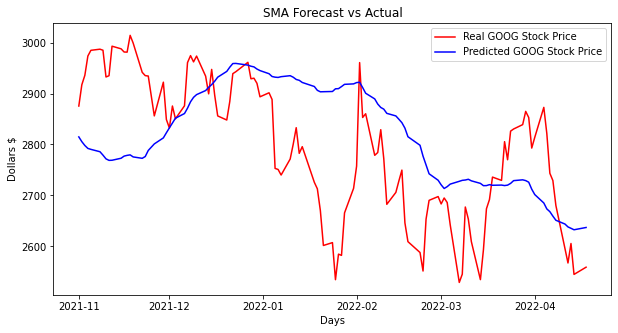

In [47]:
# Building a moving average model
window = 20

# Create a moving average over the entire dataset
moving_avg = dataset_total.rolling(window=window).mean()

# Slice the moving average on the forecast
moving_avg_forecast = moving_avg.values[split_index - window : dataset_total.index.max() - window + 1]

# Visualising the results
plt.figure(figsize=(10, 5))
plt.plot(df.loc[split_index:, 'Date'],dataset_test.values, color = 'red', label = 'Real ' + stock_name + ' Stock Price')
plt.plot(df.loc[split_index:, 'Date'],moving_avg_forecast, color = 'blue', label = 'Predicted ' + stock_name + ' Stock Price')
plt.ylabel('Dollars $')
plt.xlabel('Days')
plt.title('SMA Forecast vs Actual')
plt.legend(loc="upper right")
plt.show()